### 1. Import libraries

In [52]:
import pandas as pd
import numpy as np
import os

### 2. Import datasets

In [53]:
df_Rating = pd.read_csv(r"../data/ratings.csv")
df_Movies = pd.read_csv(r"../data/movies.csv")
df_Links = pd.read_csv(r"../data/links.csv")
df_Tags = pd.read_csv(r"../data/tags.csv")

### 3. EDA of raw datasets

In [54]:
from eda_functions import checkNullValues

print(checkNullValues(df_Rating), checkNullValues(df_Movies), checkNullValues(df_Links), checkNullValues(df_Tags))

False False True False


In [55]:
from eda_functions import countNullValues

countNullValues(df_Links)

movieId    0
imdbId     0
tmdbId     8
dtype: int64

8 movies don't have The Movie Database id's 

### 4. Merge to create Analytical Dataset (ADS) 

In [56]:
ads = pd.merge(df_Movies, df_Rating, how ='left', on=['movieId'])

ads.describe()

,movieId,userId,rating,timestamp
count,100854.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.051728,326.127564,3.501557,1.205946e+09
std,35528.850950,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8128.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [57]:
# Check null values in ADS

checkNullValues(ads)

True

In [58]:
countNullValues(ads)

movieId       0
title         0
genres        0
userId       18
rating       18
timestamp    18
dtype: int64

18 movies don't have any ratings assoiciated with them.

### 5. Create ADS features

In [59]:
# Change timestamp datatype to datetime
ads['timestamp'] = pd.to_datetime(ads['timestamp']).apply(lambda x: x.date())

# Create Year of rating
ads['year_rating'] = pd.DatetimeIndex(ads['timestamp']).year

# Create Year of movie release
ads['year_movie'] =ads['title'].str.extract('.*\((.*)\).*',expand = False)

In [60]:
ads.head()

,movieId,title,genres,userId,rating,timestamp,year_rating,year_movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1970-01-01,1970.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1970-01-01,1970.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1970-01-01,1970.0,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1970-01-01,1970.0,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1970-01-01,1970.0,1995


In [61]:
ads.dtypes

movieId          int64
title           object
genres          object
userId         float64
rating         float64
timestamp       object
year_rating    float64
year_movie      object
dtype: object

In [62]:
ads.describe()

,movieId,userId,rating,year_rating
count,100854.000000,100836.000000,100836.000000,100836.0
mean,19435.051728,326.127564,3.501557,1970.0
std,35528.850950,182.618491,1.042529,0.0
min,1.000000,1.000000,0.500000,1970.0
25%,1199.000000,177.000000,3.000000,1970.0
50%,2991.000000,325.000000,3.500000,1970.0
75%,8128.000000,477.000000,4.000000,1970.0
max,193609.000000,610.000000,5.000000,1970.0


### 6. Exploring Genres

In [63]:
#
list_Genre = ads.genres.unique()
list_Genre.shape

(951,)

There are 951 unique Genre combinations for movies.
Will have to consider all combinations of a certain Genre and tag them. Eg. All combinations of Action = Action etc.

In [64]:
list_Genre[1:5]

array(['Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy'], dtype=object)

In [67]:
# Creating a list with Genres and ratings for each movie in that genre

list_genre_rating = [] 

# Split movie genres and capture first genre description and movie rating
for rec in ads.index:
    rate = ads['rating'].iloc[rec]
    for genre in ads['genres'].iloc[rec].split('|'):
        #print(genre, rate)
        list_genre_rating.append([genre, rate])

# Convert list to dataframe
df_genre_rating = pd.DataFrame(list_genre_rating, columns=['genre','rating'])
df_genre_rating.shape

(274518, 2)

In [70]:
#Calculating average rating per Genre
df_genre_avg_rating = df_genre_rating.groupby('genre')['rating'].mean().reset_index().iloc[1:]

print("No of first genres:",df_genre_avg_rating.shape[0])
df_genre_avg_rating.head()

No of first genres: 19


,genre,rating
1,Action,3.447984
2,Adventure,3.508609
3,Animation,3.629937
4,Children,3.412956
5,Comedy,3.384721


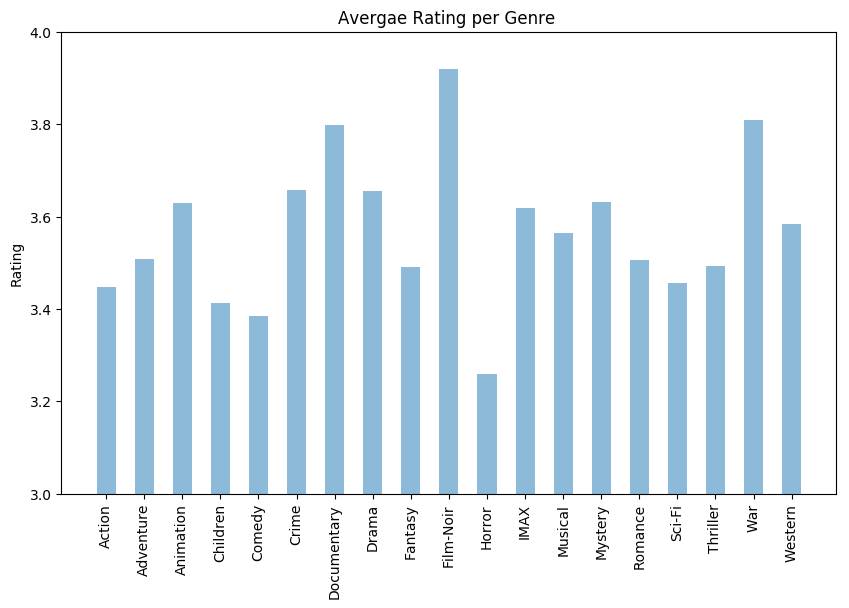

In [69]:
# Plot to visualize average rating per Genre

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6))

axes = plt.gca()

axes.set_ylim([3,4])

objects = df_genre_avg_rating['genre']
y_pos = np.arange(len(objects))
performance = df_genre_avg_rating['rating']

plt.bar(y_pos, performance, align='center', alpha=0.5
        , width=0.5)
plt.xticks(y_pos, objects, rotation = 90)
plt.ylabel('Rating')
plt.title('Avergae Rating per Genre ')

plt.show()



In [71]:
# Calculating no. of ratings per Genre

df_genre_count_movies = df_genre_rating.groupby('genre').count().\
                                    reset_index().rename(columns={"genre": "genre", 0: "movies"}).iloc[1:]

df_genre_count_movies

,genre,rating
1,Action,30635
2,Adventure,24161
3,Animation,6988
4,Children,9208
5,Comedy,39053
6,Crime,16681
7,Documentary,1219
8,Drama,41928
9,Fantasy,11834
10,Film-Noir,870


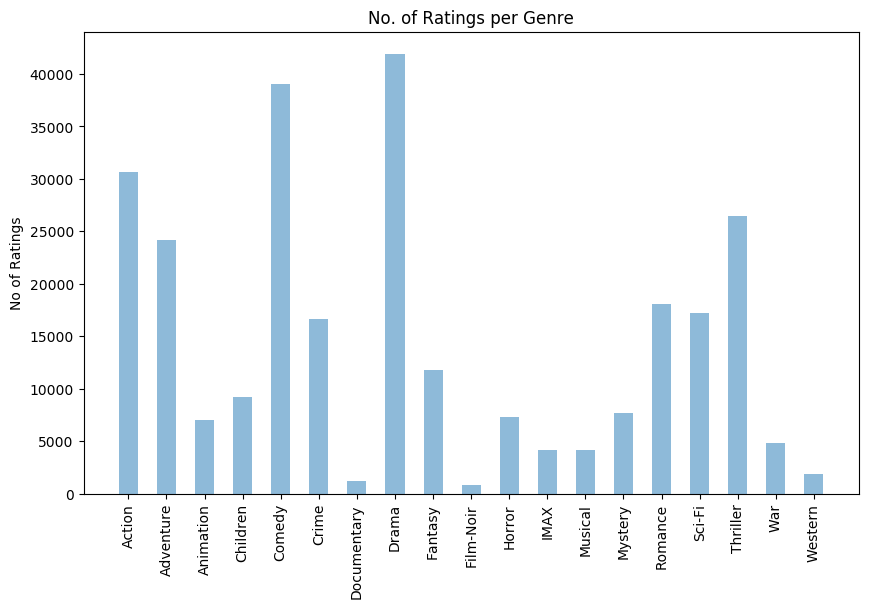

In [72]:
# Visualizing number of ratings per Genre
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6))


objects = df_genre_count_movies['genre']
y_pos = np.arange(len(objects))
performance = df_genre_count_movies['rating']

plt.bar(y_pos, performance, align='center', alpha=0.5
        , width=0.5)
plt.xticks(y_pos, objects, rotation = 90)
plt.ylabel('No of Ratings')
plt.title('No. of Ratings per Genre')

plt.show()


### 7. Exploring Movie titles

In [73]:
#Identifying movies with the maximum number of ratings
Top10_rated_titles = ads.groupby('title').size().sort_values(ascending=False)[:10]
Top10_rated_titles

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

In [74]:
#Identifying movies which have the highest ratings
Highest_rated_titles = ads.groupby('title')['rating'].mean().sort_values(ascending=False)[:10]
Highest_rated_titles

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

The above movies probably have a very low number of ratings and hence have a high average rating.
Setting a min no of ratings to be 50 to be considered as Highly rated.

In [75]:
#Filtering movies which have less than 25 ratings to find new highest rated movies
df_highest_rated_filtered = ads.groupby('title').filter(lambda x: len(x) > 25)


In [76]:
Highest_rated_titles_filtrd = df_highest_rated_filtered.groupby('title')['rating'].mean().sort_values(ascending=False)[:10]
Highest_rated_titles_filtrd

title
Shawshank Redemption, The (1994)                                               4.429022
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                                  4.333333
Philadelphia Story, The (1940)                                                 4.310345
Lawrence of Arabia (1962)                                                      4.300000
Hoop Dreams (1994)                                                             4.293103
Godfather, The (1972)                                                          4.289062
Harold and Maude (1971)                                                        4.288462
Fight Club (1999)                                                              4.272936
Cool Hand Luke (1967)                                                          4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041
Name: rating, dtype: float64

The above list of highly rated movies looks a lot more believable.

### 8. Hypothesis Testing

###  Hypothesis : IMAX Sci-Fi movies will be rated higher than NON-IMAX Sci-Fi movies

Assumption: If a movie is of IMAX Genre, the movie was watched on an IMAX Screen.

In [77]:
Sci_Fi=ads['genres'].str.contains('Sci-Fi')  # create row flags to filter ads for Sci-Fi movies
print("No of movies with Sci-Fi as genre : ",ads[Sci_Fi].shape)


# Filter movie ADS to obtain Movies having genre Sci-Fi
ads_sci_fi = ads[Sci_Fi]
ads_sci_fi.head()

No of movies with Sci-Fi as genre :  (17243, 8)


,movieId,title,genres,userId,rating,timestamp,year_rating,year_movie
1286,24,Powder (1995),Drama|Sci-Fi,6.0,4.0,1970-01-01,1970.0,1995
1287,24,Powder (1995),Drama|Sci-Fi,32.0,3.0,1970-01-01,1970.0,1995
1288,24,Powder (1995),Drama|Sci-Fi,71.0,2.0,1970-01-01,1970.0,1995
1289,24,Powder (1995),Drama|Sci-Fi,111.0,2.5,1970-01-01,1970.0,1995
1290,24,Powder (1995),Drama|Sci-Fi,181.0,3.0,1970-01-01,1970.0,1995


In [78]:
ads_sci_fi.describe()

,movieId,userId,rating,year_rating
count,17243.000000,17243.000000,17243.000000,17243.0
mean,25453.960564,327.366178,3.455721,1970.0
std,41097.481410,181.558646,1.071329,0.0
min,24.000000,1.000000,0.500000,1970.0
25%,1270.000000,182.000000,3.000000,1970.0
50%,3008.000000,325.000000,3.500000,1970.0
75%,44191.000000,477.000000,4.000000,1970.0
max,193565.000000,610.000000,5.000000,1970.0


In [24]:
Sci_Fi_IMAX=ads_sci_fi['genres'].str.contains('IMAX') # Create row flag to filter Sci-Fi movies with IMAX
print("No of Sci Fi movies that are also IMAX : ",ads_sci_fi[Sci_Fi_IMAX].shape)

# Filter Sci-Fi movie ADS to obtain Movies launced as IMAX
ads_Sci_Fi_IMAX = ads_sci_fi[Sci_Fi_IMAX]
ads_Sci_Fi_IMAX.head()

No of Sci Fi movies that are also IMAX :  (1823, 8)


,movieId,title,genres,userId,rating,timestamp,year_rating,year_movie
62356,4454,More (1998),Animation|Drama|Sci-Fi|IMAX,477.0,5.0,1970-01-01,1970.0,1998
66728,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,7.0,0.5,1970-01-01,1970.0,2002
66729,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,9.0,3.0,1970-01-01,1970.0,2002
66730,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,20.0,4.0,1970-01-01,1970.0,2002
66731,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,21.0,4.0,1970-01-01,1970.0,2002


In [79]:
ads_Sci_Fi_IMAX.describe()

,movieId,userId,rating,year_rating
count,1823.000000,1823.000000,1823.000000,1823.0
mean,67935.317060,329.267691,3.528799,1970.0
std,36223.783065,181.827226,1.021513,0.0
min,4454.000000,2.000000,0.500000,1970.0
25%,44191.000000,184.000000,3.000000,1970.0
50%,77561.000000,328.000000,3.500000,1970.0
75%,101864.000000,483.000000,4.000000,1970.0
max,122886.000000,610.000000,5.000000,1970.0


In [80]:
# Filter Sci-Fi Movie ADS for movies that are not IMAX

ads_Sci_Fi_only = ads_sci_fi[ads_sci_fi.movieId.isin(ads_Sci_Fi_IMAX.movieId) == False]

print(ads_Sci_Fi_only.shape)
ads_Sci_Fi_only.head()

(15420, 8)


,movieId,title,genres,userId,rating,timestamp,year_rating,year_movie
1286,24,Powder (1995),Drama|Sci-Fi,6.0,4.0,1970-01-01,1970.0,1995
1287,24,Powder (1995),Drama|Sci-Fi,32.0,3.0,1970-01-01,1970.0,1995
1288,24,Powder (1995),Drama|Sci-Fi,71.0,2.0,1970-01-01,1970.0,1995
1289,24,Powder (1995),Drama|Sci-Fi,111.0,2.5,1970-01-01,1970.0,1995
1290,24,Powder (1995),Drama|Sci-Fi,181.0,3.0,1970-01-01,1970.0,1995


In [81]:
ads_Sci_Fi_only.describe()

,movieId,userId,rating,year_rating
count,15420.000000,15420.000000,15420.000000,15420.0
mean,20431.683463,327.141375,3.447082,1970.0
std,38665.880738,181.531454,1.076770,0.0
min,24.000000,1.000000,0.500000,1970.0
25%,1210.000000,182.000000,3.000000,1970.0
50%,2628.000000,323.500000,3.500000,1970.0
75%,7254.000000,477.000000,4.000000,1970.0
max,193565.000000,610.000000,5.000000,1970.0


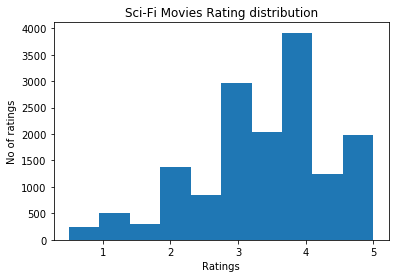

In [82]:
# Plot to try and identify the Shape of Sci-Fi movie rating distribution

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = ads_Sci_Fi_only['rating']
plt.hist(x, bins=10)
plt.title('Sci-Fi Movies Rating distribution')
plt.ylabel('No of ratings')
plt.xlabel('Ratings');

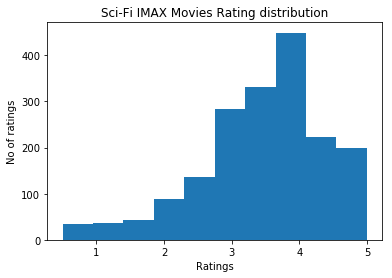

In [83]:
# Plot to try and identify the Shape of Sci-Fi IMAX movie rating distribution

%matplotlib inline

x = ads_Sci_Fi_IMAX['rating']
plt.hist(x, bins=10)
plt.title('Sci-Fi IMAX Movies Rating distribution')
plt.ylabel('No of ratings')
plt.xlabel('Ratings');

In [84]:
#Calculating mean rating for Sci-Fi movies
ads_Sci_Fi_only['rating'].mean()

3.447081712062257

In [85]:
#Calculating mean rating for Sci-Fi IMAX movies
ads_Sci_Fi_IMAX['rating'].mean()

3.5287986834887546

Need to check if the difference is statistically significant.<br>
Since the data is ordinal, a nonparamentric statistical significance test has to be used.<br>
Since we are comparing two distributions Mann-Whitney U test is a good choice.

In [86]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

# seed the random number generator
seed(1)

# generate two independent samples
rating_scifi_imax = ads_Sci_Fi_IMAX['rating']
rating_scifi_only = ads_Sci_Fi_only['rating']

# compare samples
stat, p = mannwhitneyu(rating_scifi_imax, rating_scifi_only)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('\nSame distribution (fail to reject H0)')
else:
    print('\nDifferent distribution (reject H0)')

Statistics=13446495.500, p=0.001

Different distribution (reject H0)


### 9. Results

Since the null hypothesis is disproved. The Sci-Fi Movies rating distribution and Sci-Fi IMAX movie rating distribution are not equal.

Hence the hypothesis is proved.